In [8]:
# First, import needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

# In order to see graphs under the cell 
%matplotlib inline  


## Select the datset

After having imported the necessary libraries, we can select the dataset.

Datasets are usually in the *csv* form (comma-separated values file).
It is possible to analyze the csv file noticing these few things:
1. if it is a `csv` file or other
1. for `csv`, what is the *separator* character (`,`,`;`,`\t`, ...)
1. for `csv`, is there a *header*? it is a first row containing column names
1. if there is no header, look for reasonable names, e.g. for *UCI* a `.names` file
1. if there is no header, look at the documentation of `read_csv` to see how to specify column names
1. try to understand if the dataset is supervised, and what is the *target class*.

In [9]:
# Use df as the dataframe name
df = pd.read_csv('iris.csv', header=None)

# Show column names
df.columns = ['sepal length in cm', 'sepal width in cm','petal length in cm', 'petal width in cm', 'class']

In [10]:
# and the first five rows of the dataframe
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Exploiting the sci-kit learn library, it is possible to pre-process the dataset and convert *categorical* values into numerical ones. The .LabelEncoder() method is what can ben used to do so.

In [11]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['class'])
df['class'] = le.transform(df['class'])
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

In [12]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


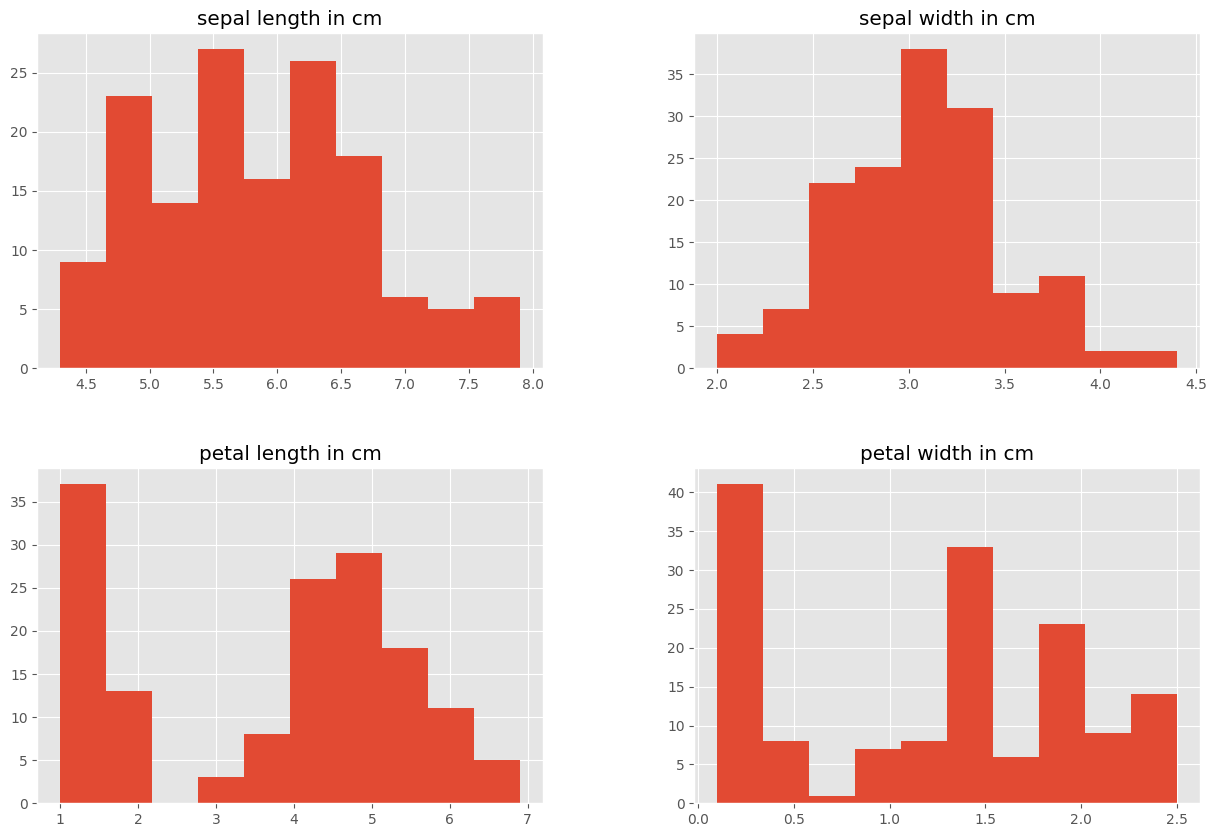

In [13]:
# Also histograms can be show for numeric values
# Through df.iloc[:, :x] it is possible to select categorical 
# columns exploiting their index.

pd.DataFrame.hist(df.iloc[:, :4],
                  figsize = [15,10]); # ; not to show types

With the describe method, it is possible to show a short summary of the characteristics of the dataframe .

In [14]:
df.iloc[:, :4].describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


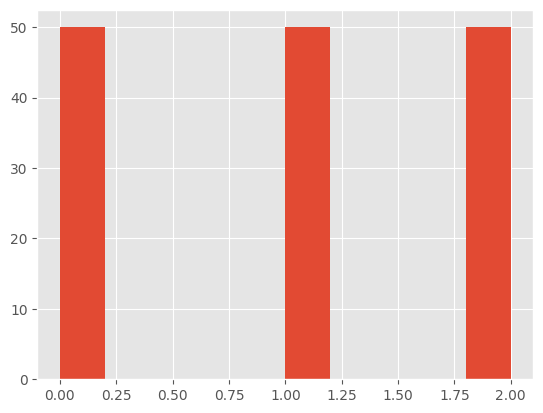

In [15]:
# Plot an histogram for the 'target column'

plt.hist(df['class']) # Predicted attribute: class of iris plant, as said in the iris.names description file
plt.show()

### Pairplot
*Pairplot* comes from the *Seaborn* library and it is a powerful data exploration tool. It shows a plot of pairs of numeric attributes, and may represent as color the attribute chosen as class (**hue** parameter).

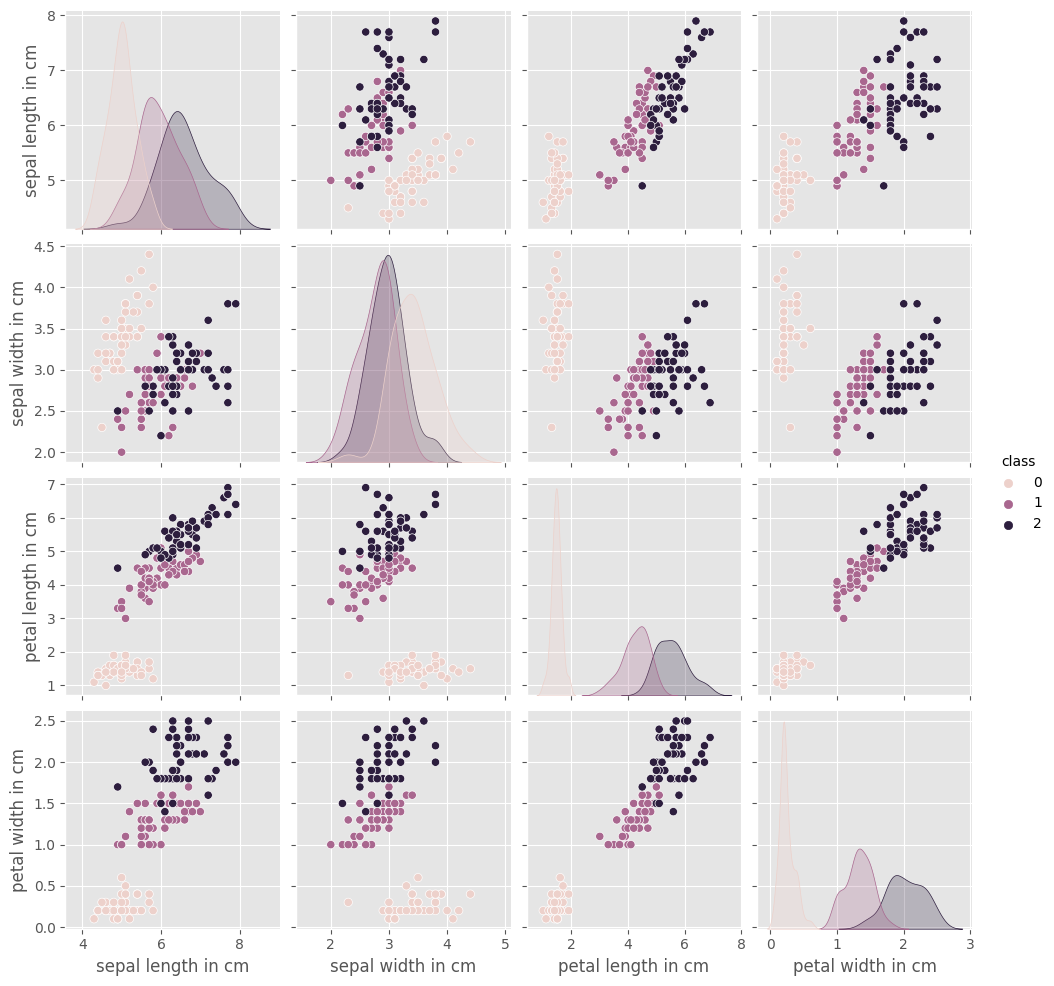

In [16]:
sns.pairplot(df, hue='class', diag_kind='kde');

### Correlation
In statistics, *correlation* or *dependence* is any statistical relationship, whether causal or not, between two random variables or bivariate data. Although in the broadest sense, "correlation" may indicate any type of association, in statistics it usually refers to the **degree to which a pair of variables are *linearly related***.


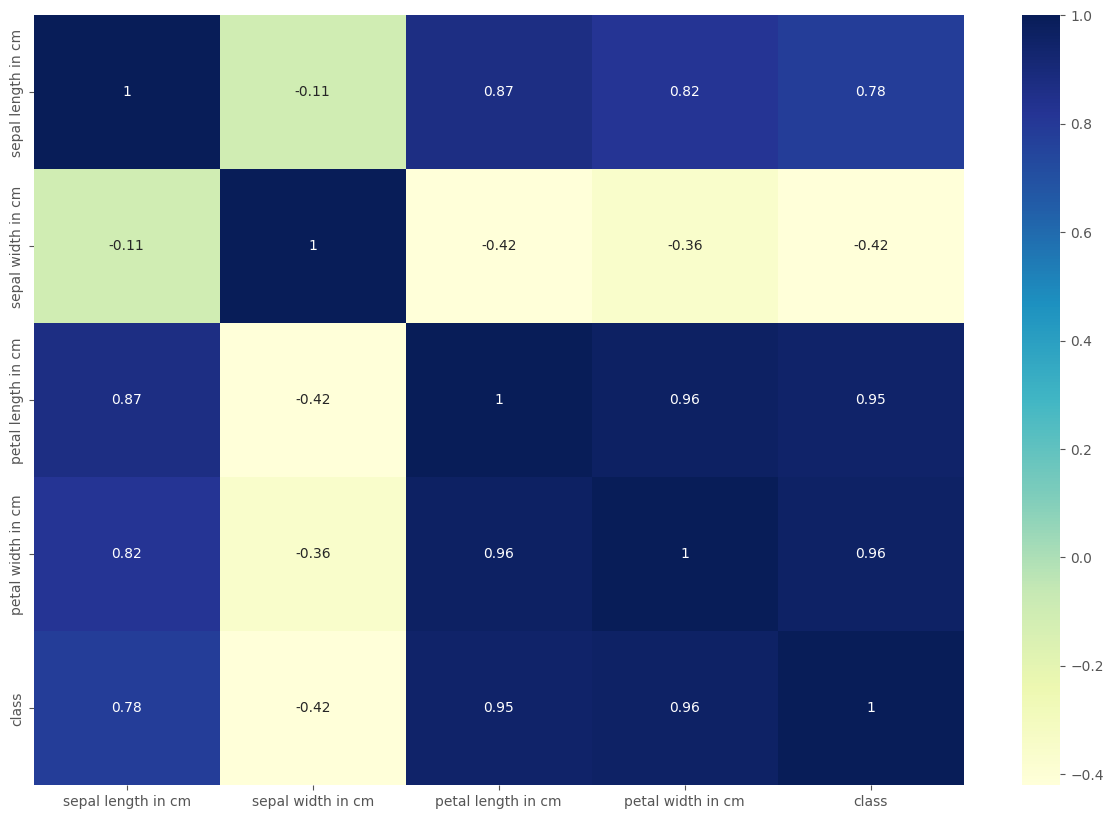

In [17]:
corr = df[df.columns].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='YlGnBu', annot = True);

Obviously the correlation between the same columns is 1, and the less related the columns are, the lowest the correlation will be. 
Displaying also the correlation with the target class shows how the features may influence the class prediction.

## Boxplot
This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs (interquartile ranges) of the lower and upper quartile, and then observations that fall outside this range are displayed independently (*outliers*). This means that each value in the boxplot corresponds to an actual observation in the data.

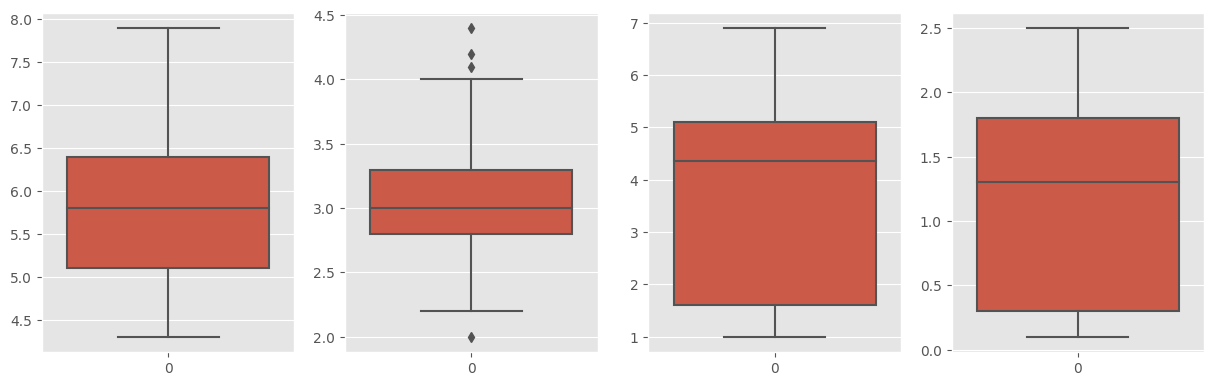

In [18]:
plt.figure(figsize=(15,15))
pos = 1
for i in df.iloc[:,:4].columns:
  plt.subplot(3,4,pos)
  sns.boxplot(data=df[i])
  pos += 1

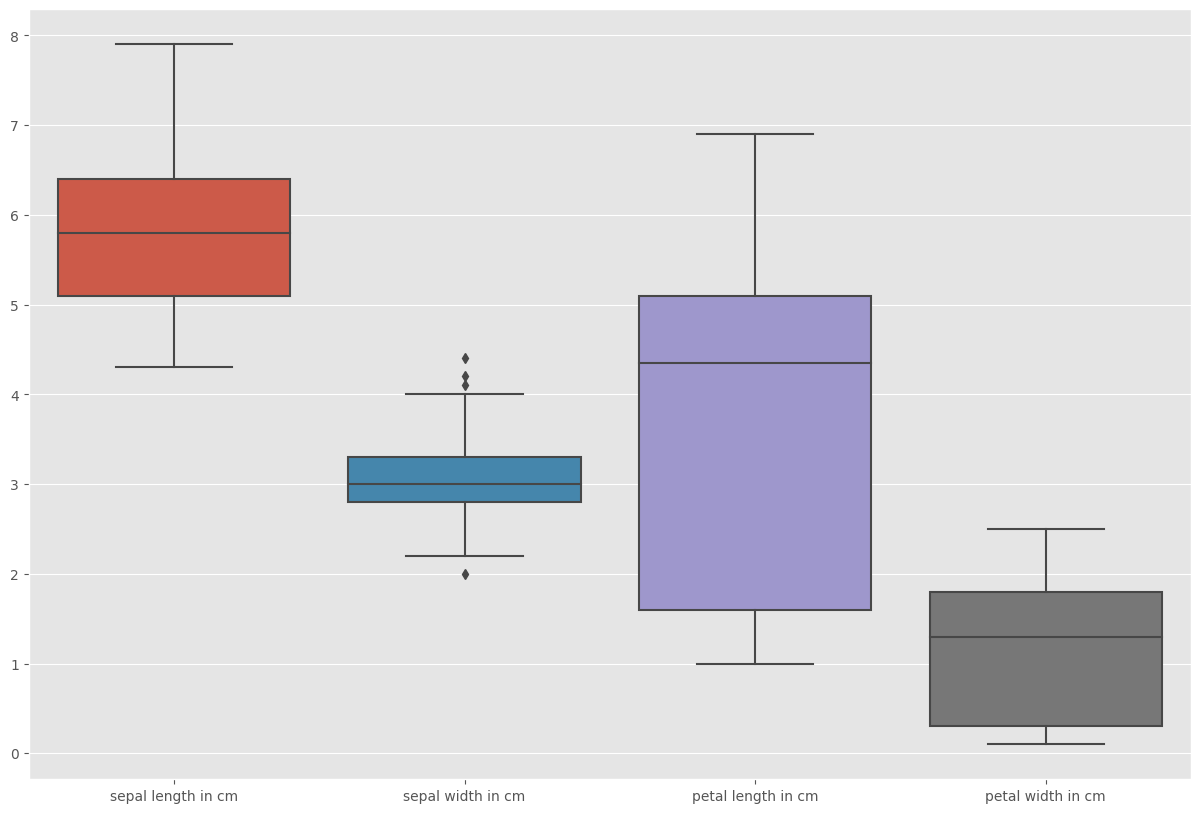

In [19]:
# Boxplots can be also shown as follows:
plt.figure(figsize=(15,10))
sns.boxplot(data = df.iloc[:,:4]);

Considering the x value as an attribute and the y value as the target, it is possible to show the relationship between the attribute considered and the relative class.

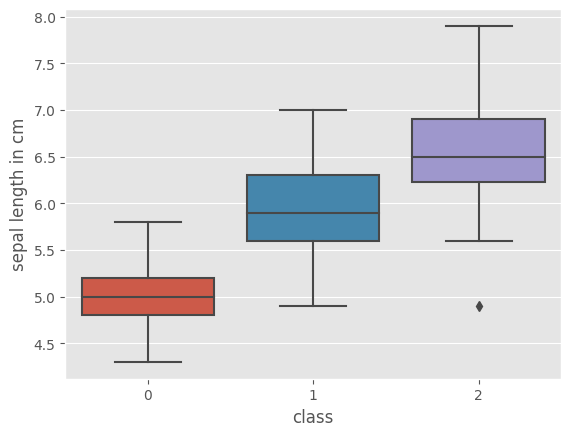

In [20]:
# e.g. sepal length in cm and class
sns.boxplot(x='class', y='sepal length in cm', data = df);

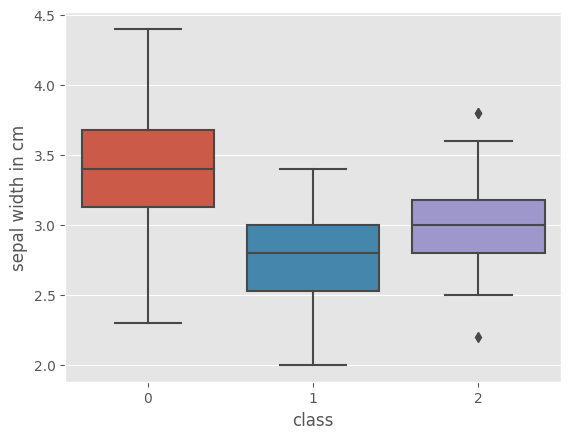

In [21]:
# e.g. sepal width in cm and class
sns.boxplot(x='class', y='sepal width in cm', data = df);

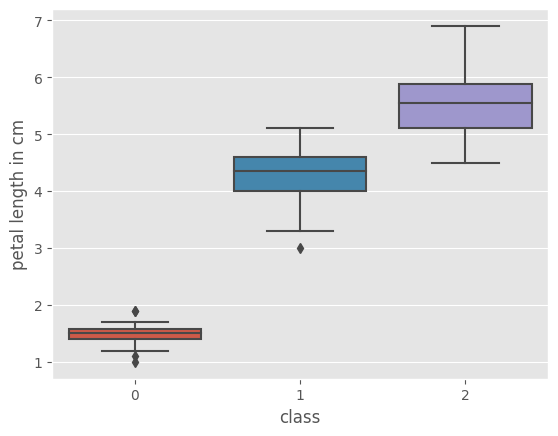

In [22]:
# e.g. petal length in cm and class
sns.boxplot(x='class', y='petal length in cm', data = df);

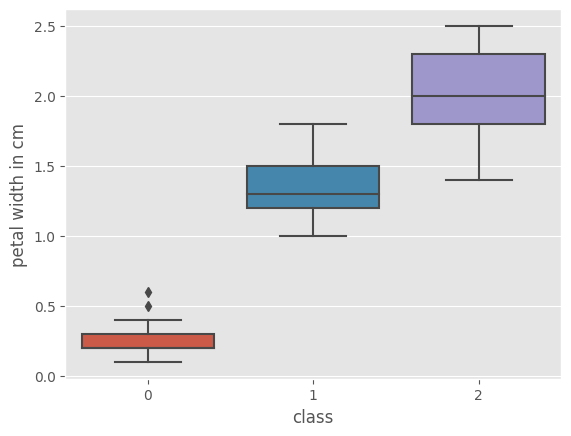

In [23]:
# e.g. petal width in cm and class
sns.boxplot(x='class', y='petal width in cm', data = df);

As seen before while studying the correlation, the attribute 'sepal width in cm' does not help much when we want to *classify* the attribute, since the box plots for the three classes have kind of all the same behavior.